<a href="https://colab.research.google.com/github/1am8anana/Tesla_Stock_Price_Prediction_using_Facebook_prophet/blob/main/Learner_notebook_TSLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesla (TSLA) Stock Price prediction using Facebook Prophet

### Importing all the necessary Libraries

In [ ]:
# Necessary libraries = Pandas, fbprophet and plotly
# pandas: for Data Manipulation and analysis
import pandas as pd
# fbprophet: for Forcasting
from prophet import Prophet
# plotly: for Data visualization
import plotly.express as px
import plotly.io as pio
pio.renderers.default='colab'

### Importing the Dataset and Exploring it

In [ ]:
# read_csv function from pandas
df = pd.read_csv('TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,31.299999,32.991333,29.478001,29.671333,29.671333,307342500
1,2020-03-17,29.334000,31.456667,26.400000,28.680000,28.680000,359919000
2,2020-03-18,25.933332,26.990667,23.367332,24.081333,24.081333,356793000
3,2020-03-19,24.980000,30.133333,23.897333,28.509333,28.509333,452932500
4,2020-03-20,29.213333,31.799999,28.386000,28.502001,28.502001,424282500
...,...,...,...,...,...,...,...
246,2021-03-08,200.183334,206.710007,186.263336,187.666672,187.666672,155361000
247,2021-03-09,202.726669,226.029999,198.403336,224.526672,224.526672,202569900
248,2021-03-10,233.433334,239.283340,218.353333,222.686661,222.686661,181817100
249,2021-03-11,233.133331,234.166672,225.726669,233.199997,233.199997,108761700


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,138.246369,141.774422,134.254906,138.379317,138.379317,1.853566e+08
std,78.302853,79.791610,76.367220,78.329273,78.329273,9.918383e+07
min,24.980000,26.990667,23.367332,24.081333,24.081333,4.547310e+07
25%,64.967003,66.461334,62.855667,64.456333,64.456333,1.088487e+08
50%,136.317337,139.566666,133.886673,136.166672,136.166672,1.668480e+08
75%,202.183334,209.264999,195.583336,202.411667,202.411667,2.439548e+08
max,297.126678,300.133331,290.533325,294.363342,294.363342,6.663786e+08


### Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
# Line graph, Area graph, box plot (Analyzing proce and volume)

In [ ]:
px.area(df, x='Date', y='Close')

In [ ]:
px.line(df, x='Date', y='Close')

In [ ]:
px.area(df, x='Date', y='Volume')

In [ ]:
px.bar(df, y='Volume')

In [ ]:
px.box(df, y='Close')

### Understanding Facebook Prophet

In [ ]:
# Facebook Prophet

# Accurate and Fast : It is accurate and generate results very fast
# Reliable : Facebook Company itself uses Prophet for Internal forecasting
# Fully Automatic : Works with missing data & No need to perform extensive data Preprocessing
# Domain Knowledge Integration : Forecasting can be made better by adding domain knowledge expertise like holidays & patterns
# Available in R and Python: We will be using Python Programming Language

### Data Preperation

In [ ]:
columns = ['Date', 'Close']
ndf = pd.DataFrame(df, columns=columns)
ndf.head(5)

,Date,Close
0,2020-03-16,29.671333
1,2020-03-17,28.680000
2,2020-03-18,24.081333
3,2020-03-19,28.509333
4,2020-03-20,28.502001


In [ ]:
prophet_df = ndf.rename(columns={'Date':'ds', 'Close':'y'})
prophet_df.head(5)

,ds,y
0,2020-03-16,29.671333
1,2020-03-17,28.680000
2,2020-03-18,24.081333
3,2020-03-19,28.509333
4,2020-03-20,28.502001


### Creating Facebook Prophet Model

In [ ]:
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpetv33mup/1p3cdmwe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpetv33mup/80crw7jj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97439', 'data', 'file=/tmp/tmpetv33mup/1p3cdmwe.json', 'init=/tmp/tmpetv33mup/80crw7jj.json', 'output', 'file=/tmp/tmpetv33mup/prophet_model9tjd6318/prophet_model-20240724043429.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:34:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:34:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### Forecasting

In [ ]:
# period: for days like 30 = 1 month
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-16,21.803169,-8.687299,47.559272,21.803169,21.803169,-1.961986,-1.961986,-1.961986,-1.961986,-1.961986,-1.961986,0.0,0.0,0.0,19.841183
1,2020-03-17,22.402317,-8.874268,50.546629,22.402317,22.402317,-0.825291,-0.825291,-0.825291,-0.825291,-0.825291,-0.825291,0.0,0.0,0.0,21.577026
2,2020-03-18,23.001466,-6.983674,50.253872,23.001466,23.001466,-1.179661,-1.179661,-1.179661,-1.179661,-1.179661,-1.179661,0.0,0.0,0.0,21.821804
3,2020-03-19,23.600614,-6.978978,50.849183,23.600614,23.600614,-1.294875,-1.294875,-1.294875,-1.294875,-1.294875,-1.294875,0.0,0.0,0.0,22.305739
4,2020-03-20,24.199763,-7.917349,50.224121,24.199763,24.199763,-2.584084,-2.584084,-2.584084,-2.584084,-2.584084,-2.584084,0.0,0.0,0.0,21.615679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2021-04-07,299.985939,271.171406,327.373574,299.596458,300.350368,-1.179661,-1.179661,-1.179661,-1.179661,-1.179661,-1.179661,0.0,0.0,0.0,298.806278
277,2021-04-08,300.803653,271.107139,327.509163,300.385373,301.193238,-1.294875,-1.294875,-1.294875,-1.294875,-1.294875,-1.294875,0.0,0.0,0.0,299.508778
278,2021-04-09,301.621367,271.176133,326.961135,301.191922,302.028837,-2.584084,-2.584084,-2.584084,-2.584084,-2.584084,-2.584084,0.0,0.0,0.0,299.037284
279,2021-04-10,302.439082,276.884966,335.159220,301.971126,302.863287,3.922950,3.922950,3.922950,3.922950,3.922950,3.922950,0.0,0.0,0.0,306.362031


In [ ]:
px.line(forecast, x='ds', y='yhat')

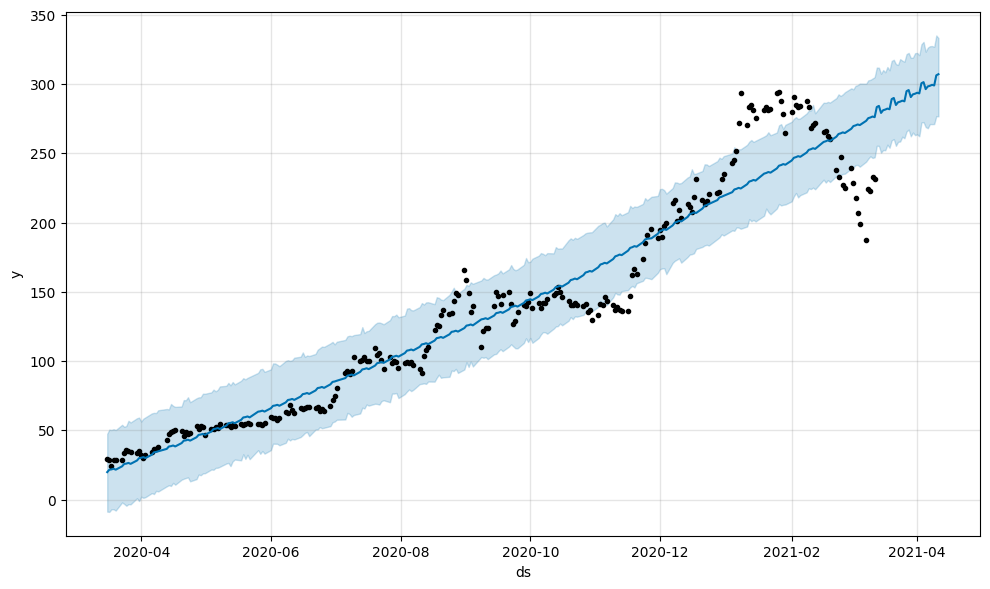

In [ ]:
figure = model.plot(forecast, xlabel='ds', ylabel='y')
# black dot is the actual prices

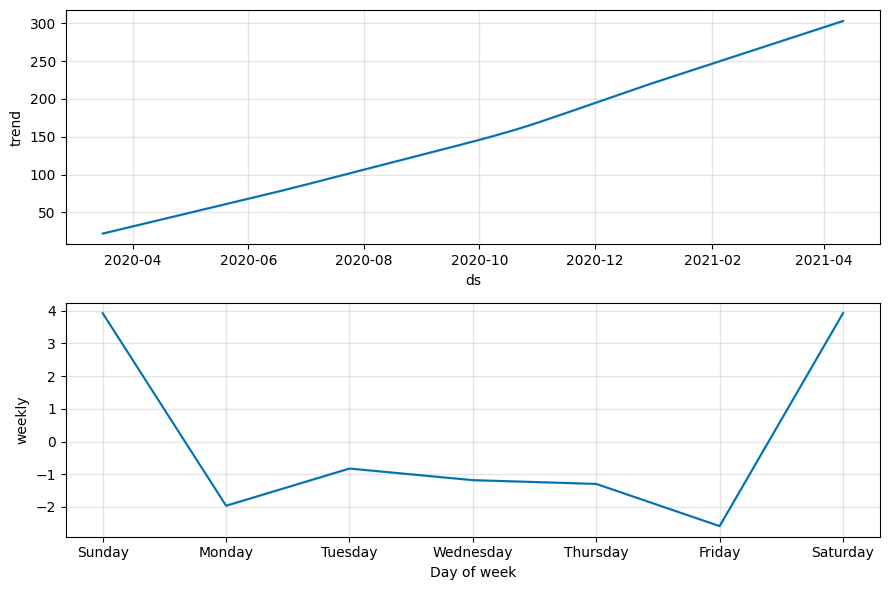

In [ ]:
figure2 = model.plot_components(forecast)

### Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>